# ^^^ pyforest auto-imports - don't write above this line
# 8 Modules differentiation

## Negative control: Genetic Modules in plant infected not present in plant healthy 

**Datatype are text files with the ID of the genes**

Made by: Cynthia Soto <br>
Date: June 18th, 2021 <br>
Last md: August 17th 2021 <br>

**Assumptions:** <br>
Exist at least 2 folders < control & infected > containing genetic modules (files) with the genes identifiers. 
The idea is to discover & present visualizations (pie-charts) with putative modules (clusters) across several logical & arithmetical comparitions. 
<br>
The methodology consist on: <br>
1. Get de arithmetic difference for each infected mod against all the control mods at x% of gene-identity (logical comparition based on the gene-ID)<br>
2. Translate the logical difference in a percentual representation (arithmetic: mod-inf-gen-dif*100 / mod-inf-gen-size) <br>
3. Keep the unique(infected mods) with <=300 genes % plot <br>
4. Get a df with the #of ocurrences where comparitions match the criterias <br>
5. Merge the count-mods df with the gene%-diff df & plot

In [1]:
import os
import matplotlib.pyplot as plt
# Set some initial configuration 
import pandas as pd
pd.set_option("display.precision", 2)
# ^^^ pyforest auto-imports - don't write above this line
#from pyforest import *  # import the 40 most popular libraries to your notebook
# to see the available libraries 
# lazy_imports()

In [2]:
os.getcwd()

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/notebooks'

In [3]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("../results-data/wgcna")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna


### Folders with modules identify in wgcna

In [4]:
# Check the available folders with genetic modules
import glob
## check a bit of the files to be processed ... are they ok?
s_path = str(os.getcwd()+'/Athal*') 
all_files = glob.glob(s_path)
for file in all_files:
    print(file)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile78.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile75.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile77.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile76.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile70.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile90.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_selected_clusters.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_comparition_profile100.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-an

### Function declaration

In [5]:
def load_ctl_mod_to_compare(s_mod_name):
    # Create a set of the module in control required
    # IN:     @ s_mod_name: name of the file containing the gene list
    # OUT:    @ set_gene_ctrl: a set containing the unique genes to be compared 
    mod = '../Athal_healthy_mods_merged_MatrixD/'+ s_mod_name
    df1 = pd.read_csv(mod, header=None)    ## nrows=100, usecols=[0,1]
    gene_inf_lst = df1[0].tolist()
    set_gene_ctrl = set(gene_inf_lst)
    #print(set_gene_ctrl)
    return set_gene_ctrl

In [6]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [7]:
def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

In [8]:
def make_pie_donut_chart(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(10,8))
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 16}, startangle=50)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.2, title, ha='center', fontsize=17)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

In [9]:
def make_pie_donut_chart2(q, lbs, title):
    fig1, ax1 = plt.subplots(figsize=(10,8))
    # Labels with percentual and float values
    ax1.pie(q, labels=lbs,autopct=make_autopct2(q), 
             textprops={'fontsize': 16}, startangle=50)              
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.text(0, -.1, title, ha='center', fontsize=24)

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return

### Modules comparitions
#### Create the list of modules in the infected dataset to be compared 
Option 1: we can pick up to make logic comparition using all the clusters (All MGI agains MGC preselected) <br>
Option 2: we can pick up to make logic comparition using pre-clusters (Preselected MGI agains MGC preselected) <br>

In [10]:
os.chdir("Athal_infected_mods_merged_MatrixE")

In [11]:
##########################################
#   This chunk is for option 1 
##########################################

# dirListing_inf = os.listdir(str(os.getcwd()))
# print("Number of modules in infected dataset:" + str(len(dirListing_inf)))
# path_files = os.getcwd()
# print(path_files)
# dirListing_inf[0:5]

In [12]:
##########################################
#   This chunk is for option 2 
##########################################

df_MGI = pd.read_csv("../Athal_infected_selected_clusters.csv", header=0, usecols=[2])
df_MGI.head(5)

,mergedColors
0,chocolate
1,chocolate2
2,green3
3,lavender
4,dodgerblue1


In [13]:
#Create the lst of the modules in recursive mod
df_MGI["mergedColors"] = 'mod_merged_' + df_MGI['mergedColors'] + '.txt'
df_MGI.head(5)
dirListing_inf = df_MGI['mergedColors'].to_list()
dirListing_inf[0:5]

['mod_merged_chocolate.txt',
 'mod_merged_chocolate2.txt',
 'mod_merged_green3.txt',
 'mod_merged_lavender.txt',
 'mod_merged_dodgerblue1.txt']

In [14]:
# preselected mods
len(dirListing_inf)

22

## Make logic commparitions between treatment & control modules (wgcna modules)

1. Create a list with the module's names (control) to be parsed in recursive mode <br>
**Option 1**: parse a directory to create the list of genetic control modules (MGC) <br>
**Option 2**: parse a file with preselected MGC to create the list of genetic control modules (MGC) <br>

2. Build a dictionary to save the result's comparitions for further analysis <br>
Parse infected modules across control modules (w/high correlation) saved in the variable 'lst_mods_ctrl' (step 1)

In [15]:
# STEP 1
# Step 1 / Option 1: This chunk parse a directory to create a list for all control (healthy) modules

# os.chdir("../Athal_healthy_mods_merged_MatrixD")
# print("Directory changed:", os.getcwd() )
# # First check the number of modules to compare 
# dirListing_ctl = os.listdir(str(os.getcwd()))
# i_mods_to_parse = len(dirListing_ctl)
# print("Number of modules in ctrl:" + str(i_mods_to_parse))

# # Second check the name of the modules
# s_path = str(os.getcwd()+'/*') 
# path_files_ctrl = glob.glob(s_path)
# #print("Path file control:", path_files_ctrl)

# #Create the lst of the modules in recursive mode
# lst_mods_ctrl=[]
# for file in path_files_ctrl:
#     #print(os.path.basename(file))
#     lst_mods_ctrl.append(os.path.basename(file))
# print(lst_mods_ctrl[0:5])
# i_mods_to_parse = len(lst_mods_ctrl)

In [22]:
# STEP 1
# Step 1 / Option 2: This chunk parse a directory to create a list for preselected control modules (healthy)
# This option takes into account that infected genetic modules be compared just with relevant healthy modules
# read csv file
df=pd.read_csv("../Athal_healthy_selected_clusters.csv", sep=',', header=0, usecols=[1])
df
#Create the lst of the modules in recursive mod
df["mergedColors"] = 'mod_merged_' + df['mergedColors'] + '.txt'
lst_mods_ctrl = df["mergedColors"].to_list()
print(lst_mods_ctrl[0:4])
i_mods_to_parse = len(lst_mods_ctrl)
print(i_mods_to_parse)
#os.chdir("../Athal_healthy_mods_merged_MatrixD")

['mod_merged_coral3.txt', 'mod_merged_mistyrose3.txt', 'mod_merged_tan1.txt', 'mod_merged_orange1.txt']
21


In [23]:
# STEP 2
# Build a dictionary to save the result's comparitions for further analysis 
# print(os.getcwd())

In [24]:
#### 
my_dict={}
x = 1
y = 1 # for assing unique keys to the dict

# os.chdir("../Athal_infected_mods_merged_MatrixE")
# print(os.getcwd())
for file in dirListing_inf:    # files is each infected module
    #print(file)
    # Prepare first set to be compared
    df1 = pd.read_csv(file, header=None)    ## nrows=100, usecols=[0,1]
    gene_list = df1[0].tolist()
    # Get a unique set of genes from the specific infected module
    uniqueGenes_inf = set(gene_list)
    #print(uniqueGenes_inf)
    mod_inf_name = str(os.path.basename(file))
    mod_inf_name_lng = len(uniqueGenes_inf)
    print("Infected Mod compare " + str(x) + ": " + mod_inf_name + ' have ' + str(mod_inf_name_lng) + ' unique genes')
   
    ##################################
    # Compare the specific infected mod against all the healthy preselected mods to the percentual diference
    # Go to the folder <<control>> because is the one to be parsed 
    os.chdir("../Athal_healthy_mods_merged_MatrixD")
    for i in range (i_mods_to_parse):  #i_mods_to_parse
        mod_name = lst_mods_ctrl[i]
        #print("Ctrl mod: ", mod_name)
        #call the function that load the healthy mod to be compared
        uniqueGenes_ctr = load_ctl_mod_to_compare(mod_name)
        dif_AB = len(uniqueGenes_inf - uniqueGenes_ctr) 
        # Make the module logic comparition
        if mod_inf_name_lng == dif_AB:
            PercDif_AB = 100
        else :
            PercDif_AB = (100 * dif_AB) / mod_inf_name_lng
        # mod_inf_name, mod_inf_name_lng, 
        mod_ctl_name_lng = len(uniqueGenes_ctr)
        #print(mod_name, '\t', mod_ctl_name_lng,'\t',dif_AB,'\t', PercDif_AB)
        # Insert the result of the comparition into a dicitonary for further analysis
        #print(y)
        my_dict[y] = {}
        my_dict[y]['Mod_Inf'] = mod_inf_name.rsplit( ".", 1 )[ 0 ] 
        my_dict[y]['Mod_Lng_Inf'] = mod_inf_name_lng
        my_dict[y]['Mod_Ctl'] = mod_name.rsplit(".",1)[0]
        my_dict[y]['Mod_Lng_Ctl'] = mod_ctl_name_lng
        my_dict[y]['Genes_diff'] = dif_AB
        my_dict[y]['Perc_diff']= PercDif_AB
        y = y+1
    ################################## 
    
    # Now change the directory bacause of another module of infected is going to be read
    os.chdir("../Athal_infected_mods_merged_MatrixE")
    x = x + 1    # to escape in the first infected mod
    #if x > 3: break
#print(my_dict)              
print("done")

Infected Mod compare 1: mod_merged_chocolate.txt have 818 unique genes
Infected Mod compare 2: mod_merged_chocolate2.txt have 573 unique genes
Infected Mod compare 3: mod_merged_green3.txt have 472 unique genes
Infected Mod compare 4: mod_merged_lavender.txt have 99 unique genes
Infected Mod compare 5: mod_merged_dodgerblue1.txt have 72 unique genes
Infected Mod compare 6: mod_merged_mediumpurple1.txt have 189 unique genes
Infected Mod compare 7: mod_merged_dodgerblue4.txt have 592 unique genes
Infected Mod compare 8: mod_merged_darkmagenta.txt have 133 unique genes
Infected Mod compare 9: mod_merged_hotpink3.txt have 1098 unique genes
Infected Mod compare 10: mod_merged_palevioletred1.txt have 368 unique genes
Infected Mod compare 11: mod_merged_tomato2.txt have 218 unique genes
Infected Mod compare 12: mod_merged_bisque4.txt have 115 unique genes
Infected Mod compare 13: mod_merged_deepskyblue.txt have 39 unique genes
Infected Mod compare 14: mod_merged_blue2.txt have 416 unique gene

In [25]:
my_dict[1]
#my_dict[1]['Perc_diff']

{'Mod_Inf': 'mod_merged_chocolate',
 'Mod_Lng_Inf': 818,
 'Mod_Ctl': 'mod_merged_coral3',
 'Mod_Lng_Ctl': 2024,
 'Genes_diff': 758,
 'Perc_diff': 92.66503667481662}

In [26]:
# Creates DataFrame with the dict 
# Lists of dictionaries and row index.
df = pd.DataFrame(my_dict, index =['Mod_Inf','Mod_Lng_Inf','Mod_Ctl','Mod_Lng_Ctl','Genes_diff','Perc_diff'])
# Print the data
df

,1,2,3,4,5,6,7,8,9,10,...,453,454,455,456,457,458,459,460,461,462
Mod_Inf,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,mod_merged_chocolate,...,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite,mod_merged_antiquewhite
Mod_Lng_Inf,818,818,818,818,818,818,818,818,818,818,...,135,135,135,135,135,135,135,135,135,135
Mod_Ctl,mod_merged_coral3,mod_merged_mistyrose3,mod_merged_tan1,mod_merged_orange1,mod_merged_deepskyblue,mod_merged_darkolivegreen4,mod_merged_thistle1,mod_merged_magenta2,mod_merged_lightblue1,mod_merged_darkolivegreen2,...,mod_merged_antiquewhite,mod_merged_navajowhite3,mod_merged_mediumpurple1,mod_merged_coral1,mod_merged_mediumpurple3,mod_merged_navajowhite1,mod_merged_blue3,mod_merged_brown3,mod_merged_antiquewhite3,mod_merged_firebrick2
Mod_Lng_Ctl,2024,33,33,95,834,1792,273,204,195,1175,...,577,492,273,141,109,87,79,39,764,210
Genes_diff,758,813,816,816,805,781,812,816,814,807,...,133,135,135,135,135,135,135,134,134,135
Perc_diff,92.67,99.39,99.76,99.76,98.41,95.48,99.27,99.76,99.51,98.66,...,98.52,100,100,100,100,100,100,99.26,99.26,100


In [27]:
# number of comparitions done
len(df.columns)

462

In [28]:
# transpose the df to re-organize data
df_comp = df.T
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_chocolate,818,mod_merged_coral3,2024,758,92.67
2,mod_merged_chocolate,818,mod_merged_mistyrose3,33,813,99.39
3,mod_merged_chocolate,818,mod_merged_tan1,33,816,99.76


In [29]:
# # Save the file with the comparition results
# df_comp.to_csv("../modules_merged_comparition.csv", sep=",", header=True)

### Make profiles for each infected module based on the porcentualm difference against the MGC
We set threshold difference at 80%, 90%, 95% and 100%
Base on the number of infected mods differenced from the healthy mods in the % criteria of gene identity

In [30]:
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_chocolate,818,mod_merged_coral3,2024,758,92.67
2,mod_merged_chocolate,818,mod_merged_mistyrose3,33,813,99.39
3,mod_merged_chocolate,818,mod_merged_tan1,33,816,99.76


In [31]:
# # show a treemap plot over the Gene difference in the comparitions
# import squarify 

# df_comp.sort_values('Genes_diff', ascending=False, inplace=True)
# print(df_comp.head(5))
# fig, ax = plt.subplots(1, figsize = (12,12))
# squarify.plot(sizes=df_comp['Genes_diff'], 
#               label=df_comp['Mod_Inf'][:5], 
#               alpha=.8 )
# plt.axis('off')
# plt.show()

### Set the percentual differenciation threshold

**Get a dataset filtered by gene difference (% identity) & groupby mod name (infected) to cut off redundancy and count the number of ocurrences**

In [89]:
# selecting rows based on condition 
perc_dif_set = 77
rslt_df = df_comp[(df_comp['Perc_diff'] >= perc_dif_set)] 
print(rslt_df.head(10))
print(len(rslt_df))
# Get the number of control modules differenced from the infected dataset
df1_count = rslt_df.groupby(['Mod_Inf']).count()
print(len(df1_count))
df1_count.head(10)

                 Mod_Inf Mod_Lng_Inf                     Mod_Ctl Mod_Lng_Ctl  \
1   mod_merged_chocolate         818           mod_merged_coral3        2024   
2   mod_merged_chocolate         818       mod_merged_mistyrose3          33   
3   mod_merged_chocolate         818             mod_merged_tan1          33   
4   mod_merged_chocolate         818          mod_merged_orange1          95   
5   mod_merged_chocolate         818      mod_merged_deepskyblue         834   
6   mod_merged_chocolate         818  mod_merged_darkolivegreen4        1792   
7   mod_merged_chocolate         818         mod_merged_thistle1         273   
8   mod_merged_chocolate         818         mod_merged_magenta2         204   
9   mod_merged_chocolate         818       mod_merged_lightblue1         195   
10  mod_merged_chocolate         818  mod_merged_darkolivegreen2        1175   

   Genes_diff Perc_diff  
1         758     92.67  
2         813     99.39  
3         816     99.76  
4         816  

,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
Mod_Inf,,,,,
mod_merged_antiquewhite,21,21,21,21,21
mod_merged_bisque4,20,20,20,20,20
mod_merged_blue2,21,21,21,21,21
mod_merged_brown2,21,21,21,21,21
mod_merged_chocolate,21,21,21,21,21
mod_merged_chocolate2,21,21,21,21,21
mod_merged_darkmagenta,21,21,21,21,21
mod_merged_darkolivegreen4,21,21,21,21,21
mod_merged_deepskyblue,21,21,21,21,21


In [90]:
# The count-module infected dataset is sorted by counts to build a nice plot further
df1_count.reset_index(inplace=True)
df1_count.sort_values(by='Mod_Lng_Inf', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
df1_count = df1_count[['Mod_Inf','Mod_Lng_Inf']]
df1_count = df1_count.rename(columns = {'Mod_Lng_Inf':'Mods_count'})
# df1_count.to_csv("../Athal_infected_mods_comparition_profile"+ str(perc_dif_set)  +".csv", index=False, header=True)  #wgcna folder
df1_count.head(5)

,Mod_Inf,Mods_count
0,mod_merged_antiquewhite,21
10,mod_merged_dodgerblue4,21
20,mod_merged_tan3,21
19,mod_merged_palevioletred1,21
18,mod_merged_mediumpurple1,21


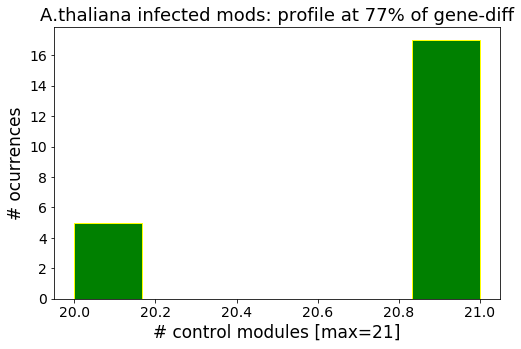

In [91]:
# build a histogram to show the number of ocurrences (module-count by infected module)
ax = df1_count.hist(column='Mods_count', grid=False, color='green', edgecolor="yellow", bins='auto', figsize=(8,5)) # bins=3
plt.title('A.thaliana infected mods: profile at '+ str(perc_dif_set) +'% of gene-diff',fontsize=18);
plt.xlabel('# control modules [max=21]',fontsize=17);
plt.ylabel('# ocurrences',fontsize=17);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [92]:
# from the rslt_df (filtered at x%) df get the unique mod-names (infected) --this have other fields need it for plotting
df_unique_inf = rslt_df.drop_duplicates(subset=["Mod_Inf"])
print(len(df_unique_inf))
print(df_unique_inf.head(3))

22
                  Mod_Inf Mod_Lng_Inf            Mod_Ctl Mod_Lng_Ctl  \
1    mod_merged_chocolate         818  mod_merged_coral3        2024   
22  mod_merged_chocolate2         573  mod_merged_coral3        2024   
43      mod_merged_green3         472  mod_merged_coral3        2024   

   Genes_diff Perc_diff  
1         758     92.67  
22        495     86.39  
43        456     96.61  


In [93]:
# get the modules (infected) with gene-member-density less than 300 genes
df_preselected_mods = df_unique_inf[df_unique_inf['Mod_Lng_Inf']<=300]
mods_count = len(df_preselected_mods)
print(mods_count)
# sort by gene-size to plot
df_preselected_mods = df_preselected_mods.sort_values(by=['Mod_Lng_Inf'], ascending=False)
df_preselected_mods.head(5)

13


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
295,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
337,mod_merged_green,236,mod_merged_coral3,2024,222,94.07
211,mod_merged_tomato2,218,mod_merged_coral3,2024,180,82.57
421,mod_merged_lightblue2,196,mod_merged_coral3,2024,194,98.98
106,mod_merged_mediumpurple1,189,mod_merged_coral3,2024,164,86.77


### Plot a pie chart to show putative gene-mods (infected) that passed 2 criterias:
1. Gene-identity surpass x% <br>
2. Gene-size mod is less than x <br>

**Result**: number of 'ocurrences' different against 'mods-control' is a clue to select mods to track in the biology context

In [94]:
# get series for plotting a pie chart
labels = df_preselected_mods["Mod_Inf"].to_list()
labels = ([s.replace('mod_merged_', '') for s in labels])
#labels
quantity = df_preselected_mods["Mod_Lng_Inf"].to_list()
quantity[0:4]

[261, 236, 218, 196]

In [95]:
# fig1, ax1 = plt.subplots(figsize=(10,8))

# # Labels with percentual and float values
# ax1.pie(quantity, labels=labels,autopct=make_autopct2(quantity), 
#          textprops={'fontsize': 14}, startangle=50)              
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# ax1.text(0, -.2, '20 Athal infected \npreselected mods \n\ncorr ~0.80 \ngene-diff-ID>80 \nmod-size<=300 genes', 
#          ha='center', fontsize=17)

# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# #plt.title("Preselected modules in Arabidopsis infected (corr ~0.80)\ngene-diff-ID>80% & mod-size<=300 genes", fontsize=20)
# plt.show()

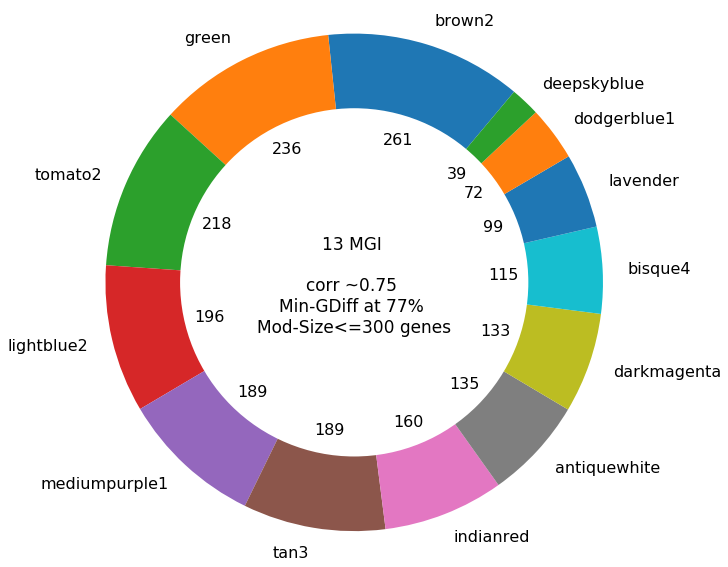

In [96]:
text = str(mods_count)+ ' MGI \n\ncorr ~0.75 \nMin-GDiff at '+ str(perc_dif_set) +'% \nMod-Size<=300 genes'
make_pie_donut_chart(quantity, labels, text)

### Plot the same dataset result now by mods ocurrence difference 
Merge by 'Mod_Inf' the count-ocurrences df with the preselected df

In [97]:
print(df1_count.head(3))
df_preselected_mods.head(30)

                    Mod_Inf  Mods_count
0   mod_merged_antiquewhite          21
10   mod_merged_dodgerblue4          21
20          mod_merged_tan3          21


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
295,mod_merged_brown2,261,mod_merged_coral3,2024,221,84.67
337,mod_merged_green,236,mod_merged_coral3,2024,222,94.07
211,mod_merged_tomato2,218,mod_merged_coral3,2024,180,82.57
421,mod_merged_lightblue2,196,mod_merged_coral3,2024,194,98.98
106,mod_merged_mediumpurple1,189,mod_merged_coral3,2024,164,86.77
358,mod_merged_tan3,189,mod_merged_coral3,2024,163,86.24
379,mod_merged_indianred,160,mod_merged_coral3,2024,152,95.0
442,mod_merged_antiquewhite,135,mod_merged_coral3,2024,124,91.85
148,mod_merged_darkmagenta,133,mod_merged_coral3,2024,103,77.44
233,mod_merged_bisque4,115,mod_merged_mistyrose3,33,115,100


In [98]:
df_preselected_counts = pd.merge(df_preselected_mods, df1_count, how="left", on="Mod_Inf")
df_preselected_counts2 = df_preselected_counts[['Mod_Inf','Mods_count']] #.sort_values(by=['Mod_Lng_Inf_y'], ascending=False)
print(len(df_preselected_counts2))
df_preselected_counts2.head(3)

13


,Mod_Inf,Mods_count
0,mod_merged_brown2,21
1,mod_merged_green,21
2,mod_merged_tomato2,21


In [99]:
# get the maximum number of modules matching the criterias
i_max_mods = max(df_preselected_counts2['Mods_count'].to_list())
i_max_mods

21

In [100]:
# get modules (infected) differente in the MGC preselected
df_preselected_counts3 = df_preselected_counts2[df_preselected_counts2['Mods_count']>=i_max_mods]
print(len(df_preselected_counts3))

9


In [101]:
labels = df_preselected_counts3["Mod_Inf"].to_list()
labels = ([s.replace('mod_merged_', '') for s in labels])
print(labels)
quantity = df_preselected_counts3["Mods_count"].to_list()
quantity[0:4]

['brown2', 'green', 'tomato2', 'mediumpurple1', 'tan3', 'indianred', 'antiquewhite', 'darkmagenta', 'deepskyblue']


[21, 21, 21, 21]

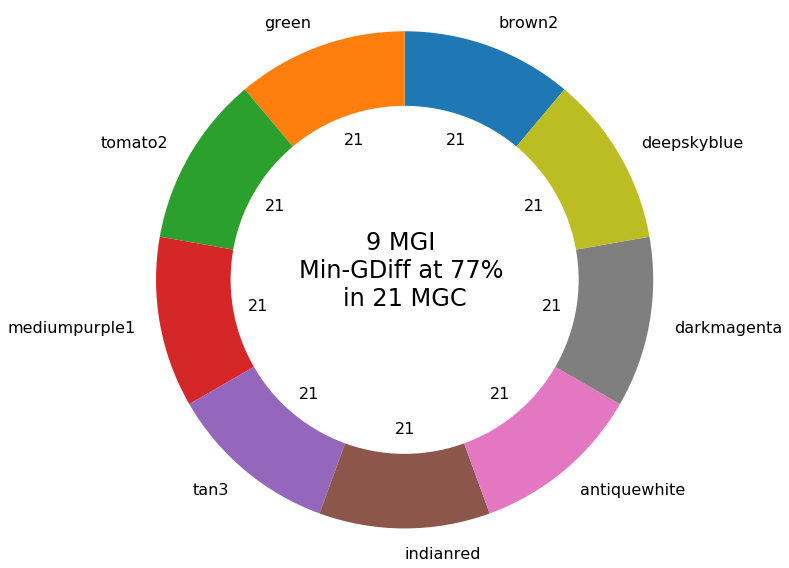

In [102]:
mods_count = len(df_preselected_counts3)
text = str(mods_count) +' MGI \nMin-GDiff at '+ str(perc_dif_set) +'% \nin ' + str(i_max_mods) + ' MGC'
make_pie_donut_chart2(quantity, labels, text)